<a href="https://colab.research.google.com/github/Neha-Anjum263/Adult-Income-Prediction/blob/main/Copy_of_Adult_Income_Prediction%7CML%7C86_32_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub
mosapabdelghany_adult_income_prediction_dataset_path = kagglehub.dataset_download('mosapabdelghany/adult-income-prediction-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'adult-income-prediction-dataset' dataset.
Data source import complete.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



## Adult Income Prediction

## 📝 Detailed Description

The Adult Income Prediction Dataset is widely used for classification tasks. The objective is to predict whether an individual's income exceeds $50K per year based on demographic and employment attributes such as age, education, occupation, work class, marital status, hours per week, etc.

This dataset is a benchmark for machine learning, often used to test preprocessing, feature engineering, and the performance of different algorithms like Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, and Neural Networks.

It’s valuable for learning:

Handling categorical and numerical features

Feature encoding and scaling

Building predictive ML models

Evaluating classification metrics (accuracy, precision, recall, F1-score, ROC-AUC)

## Import dataset

In [ ]:
df = pd.read_csv("/kaggle/input/adult-income-prediction-dataset/adult.csv")

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df.duplicated().sum()

np.int64(24)

In [ ]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

## Data visualizations

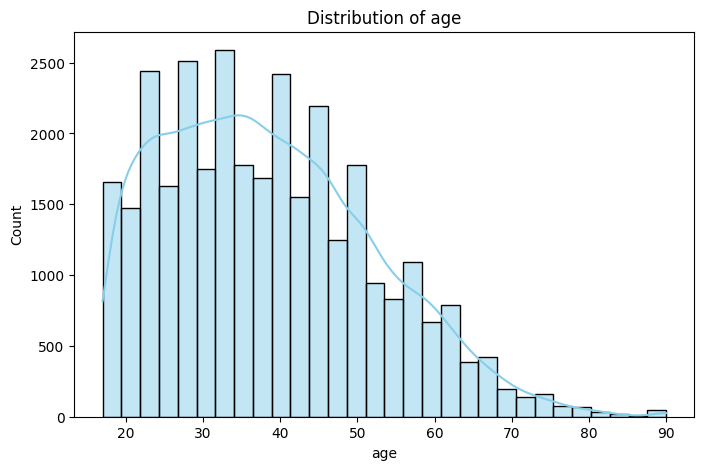

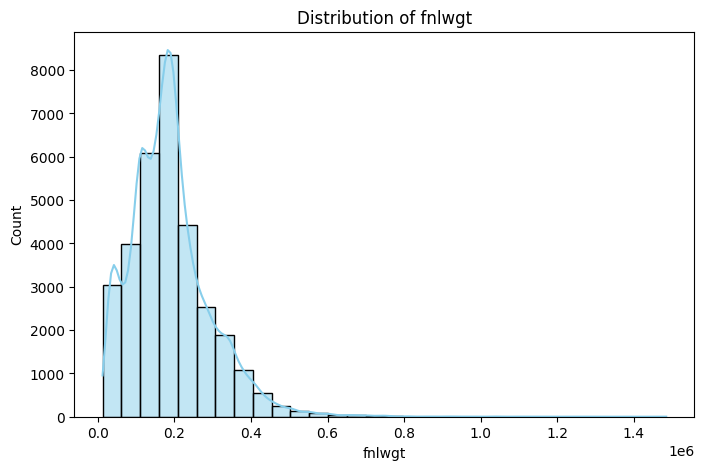

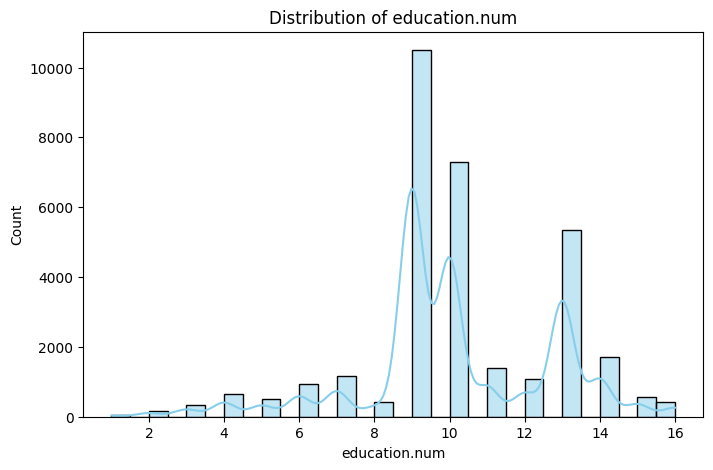

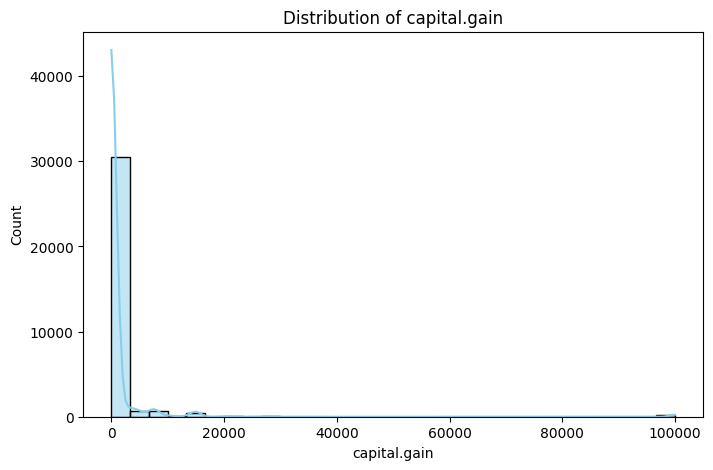

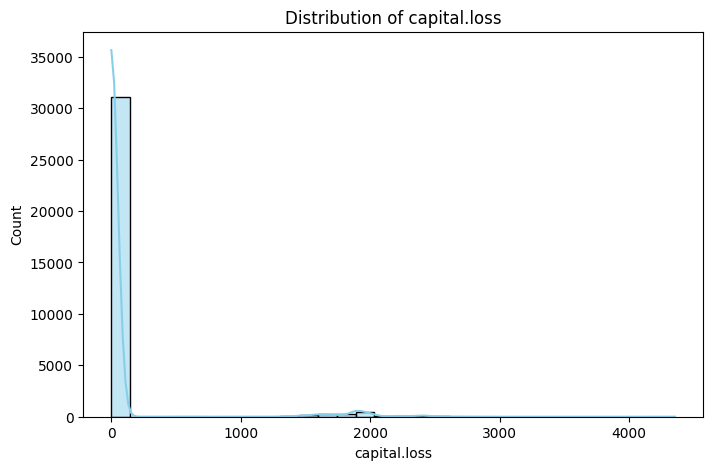

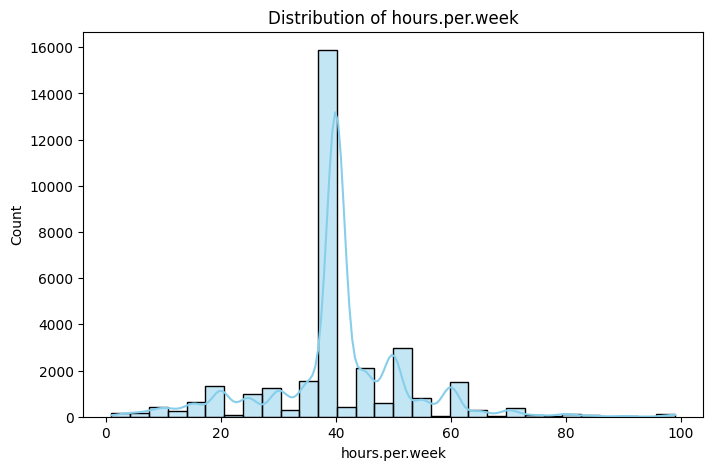

In [ ]:
num_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.show()


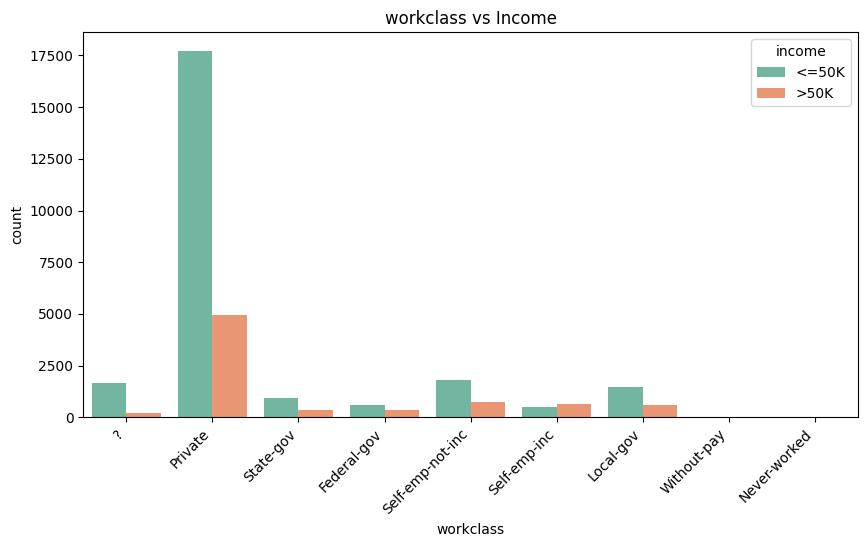

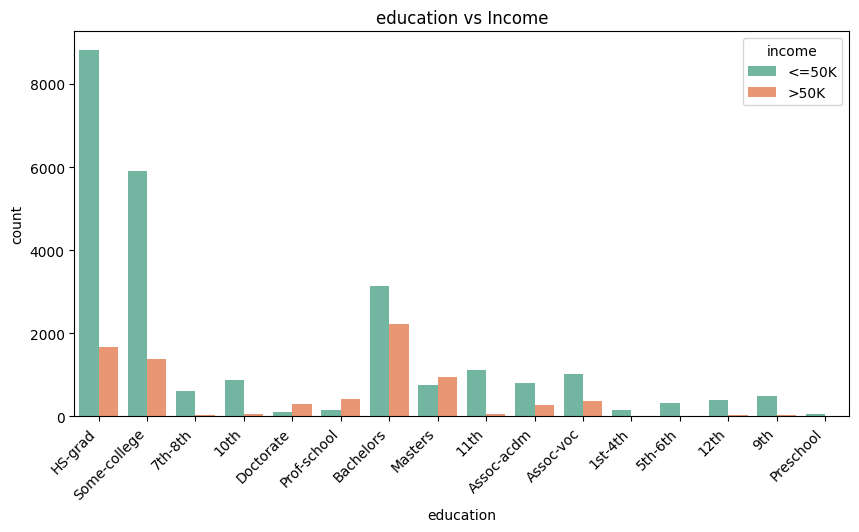

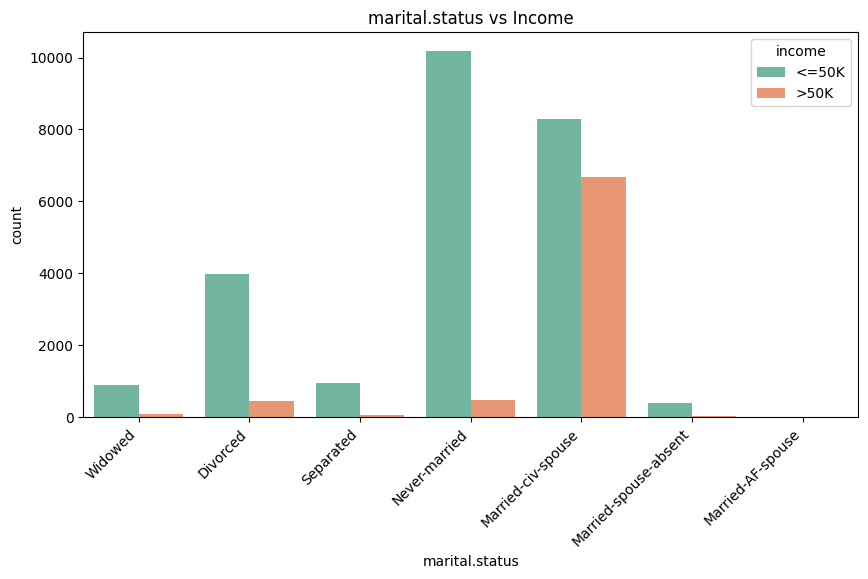

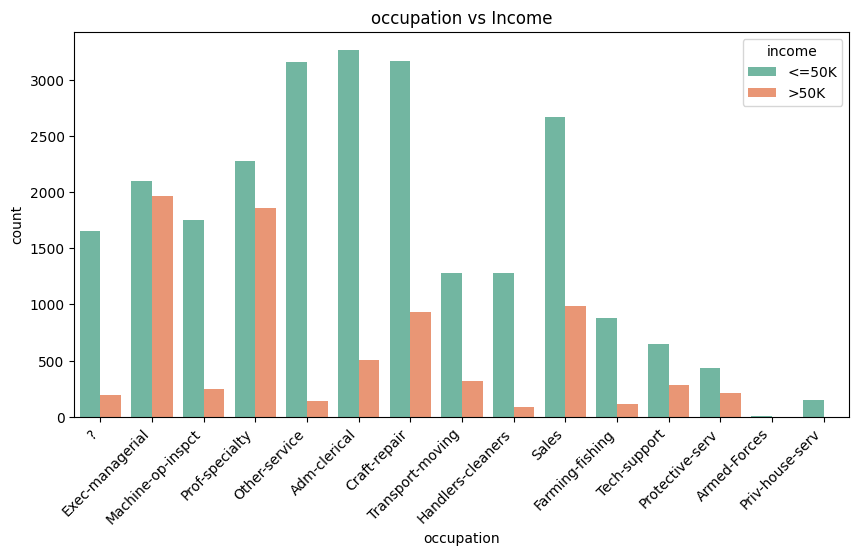

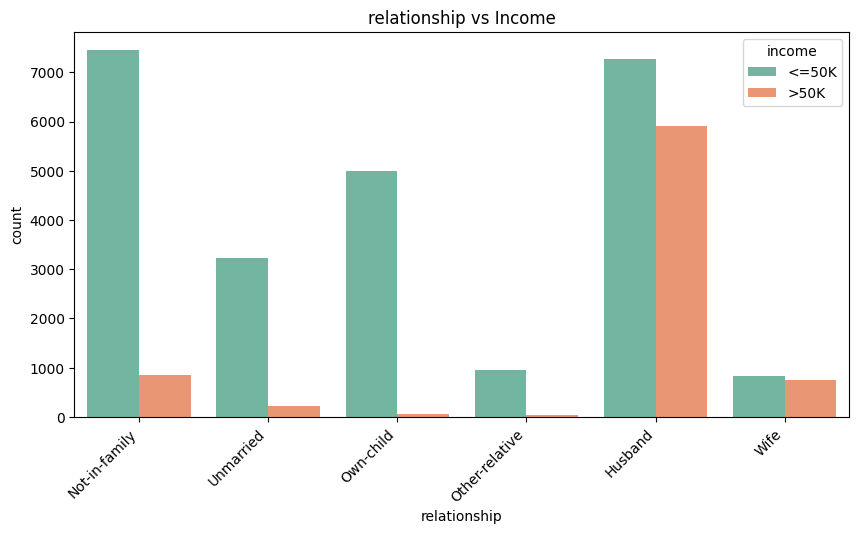

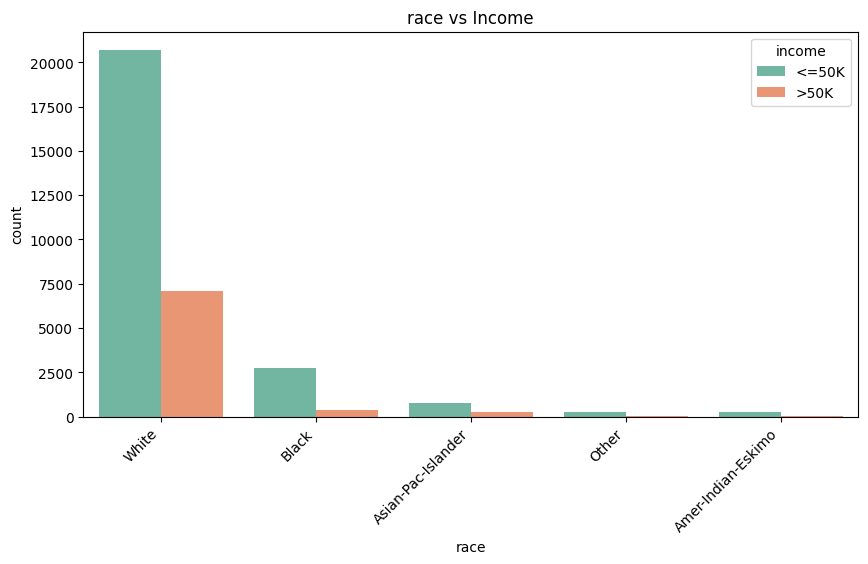

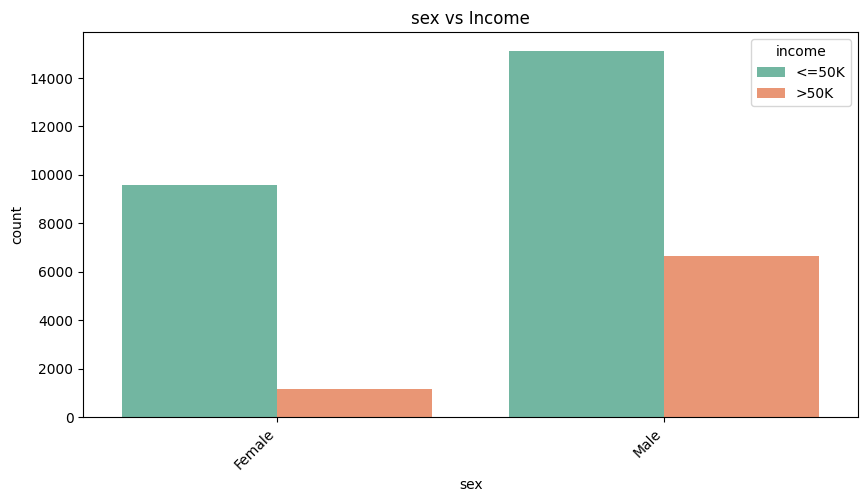

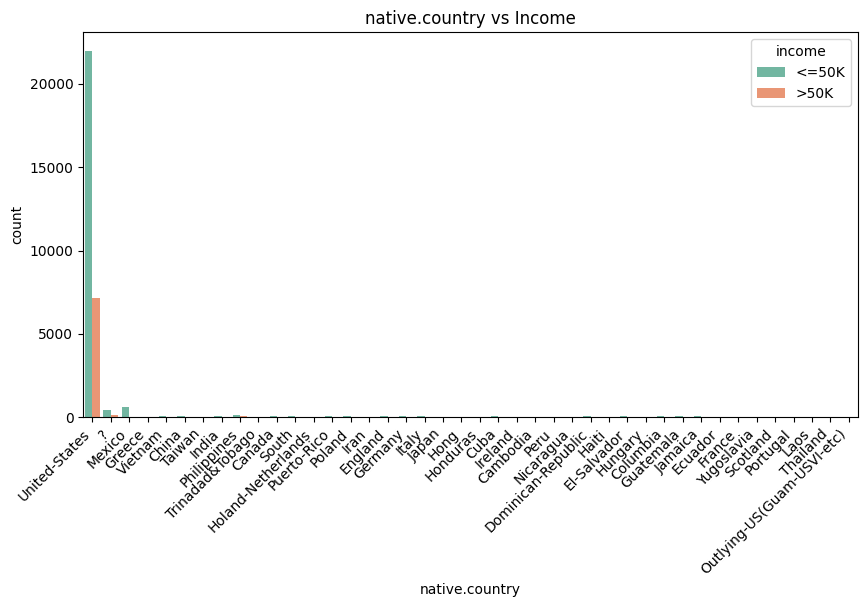

In [ ]:
cat_cols = ['workclass', 'education', 'marital.status', 'occupation',
            'relationship', 'race', 'sex', 'native.country']

for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, hue="income", palette="Set2")
    plt.title(f"{col} vs Income")
    plt.xticks(rotation=45, ha="right")
    plt.show()

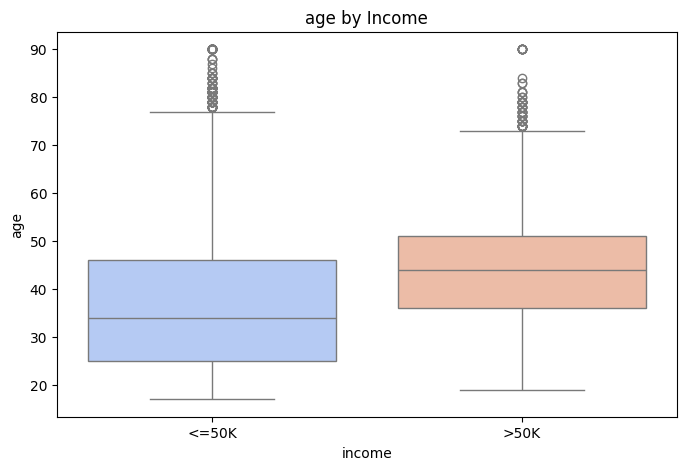

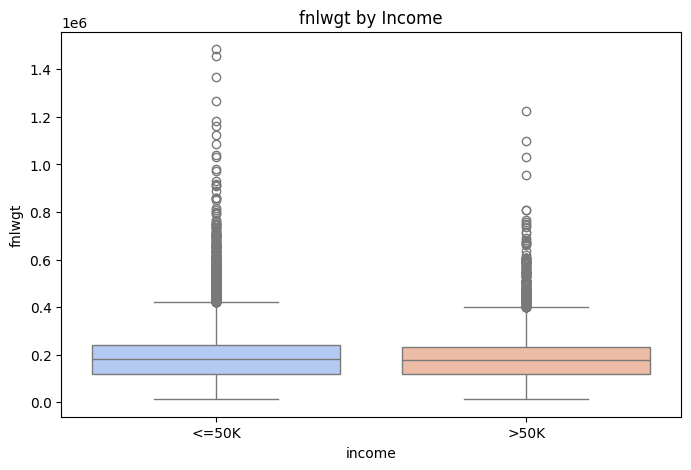

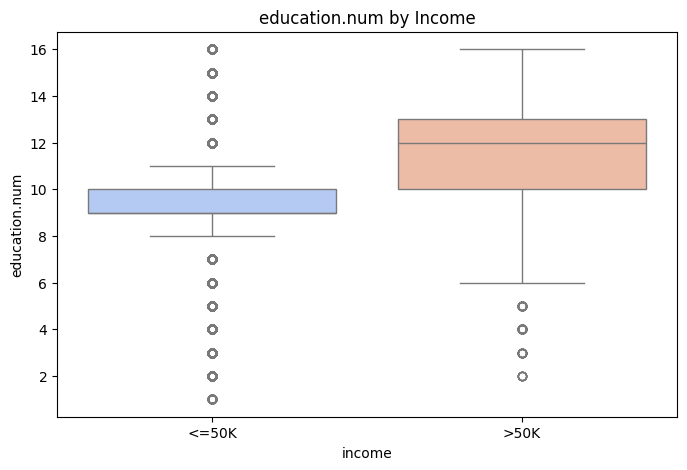

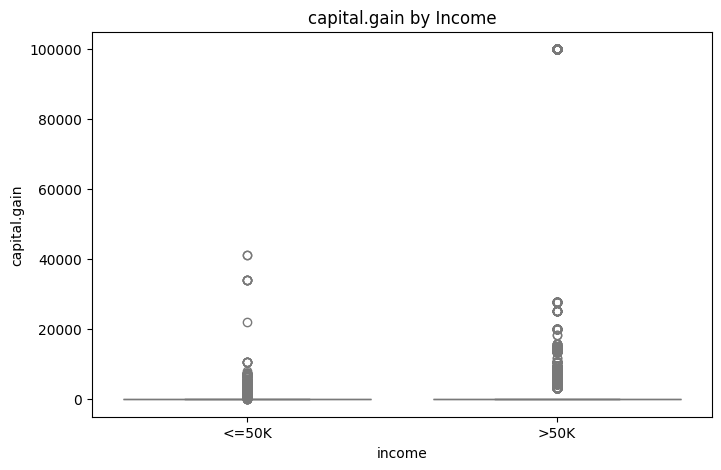

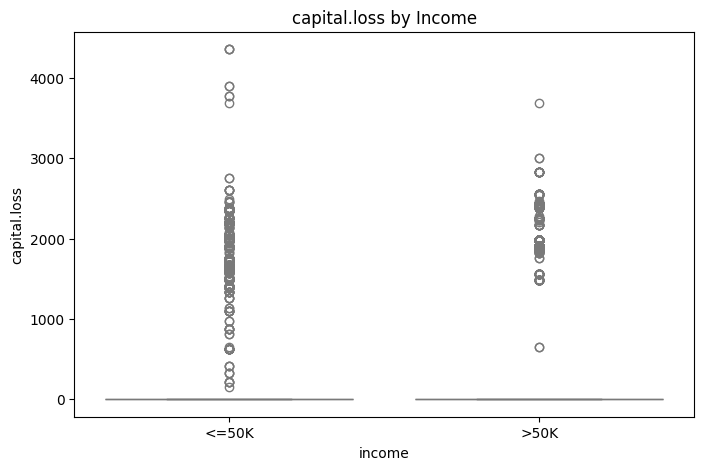

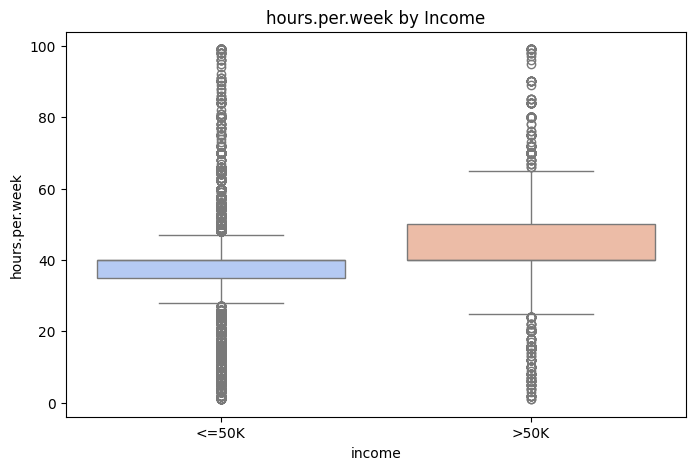

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x="income", y=col, palette="coolwarm")
    plt.title(f"{col} by Income")
    plt.show()

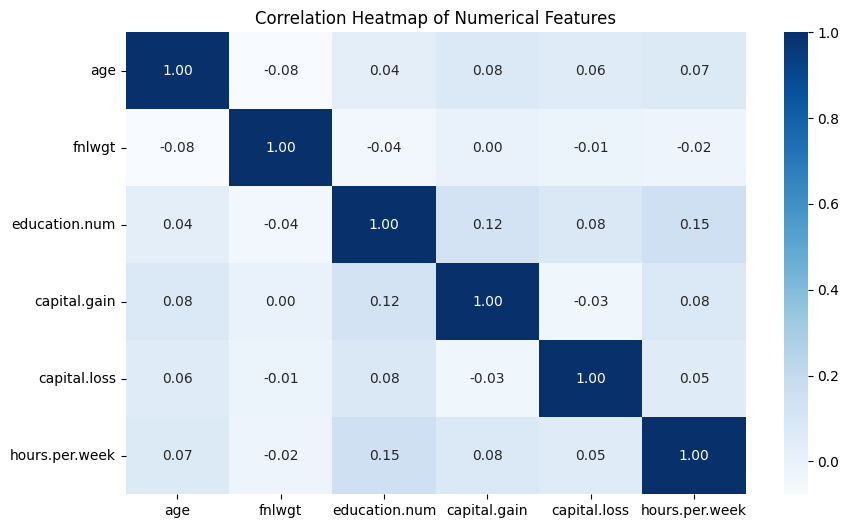

In [ ]:
plt.figure(figsize=(10,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

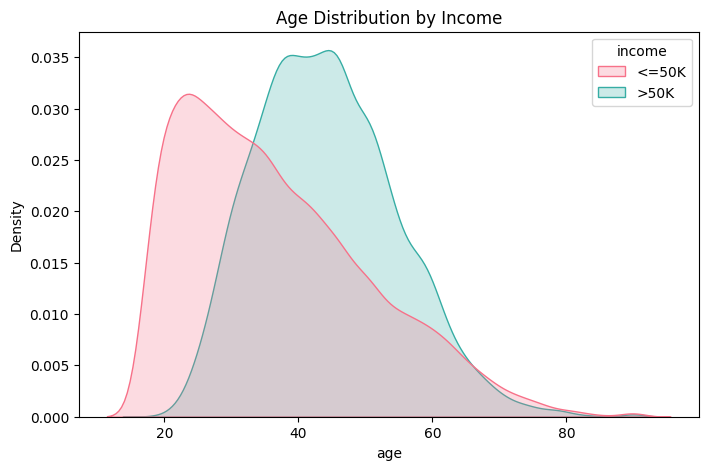

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="age", hue="income", fill=True, common_norm=False, palette="husl")
plt.title("Age Distribution by Income")
plt.show()

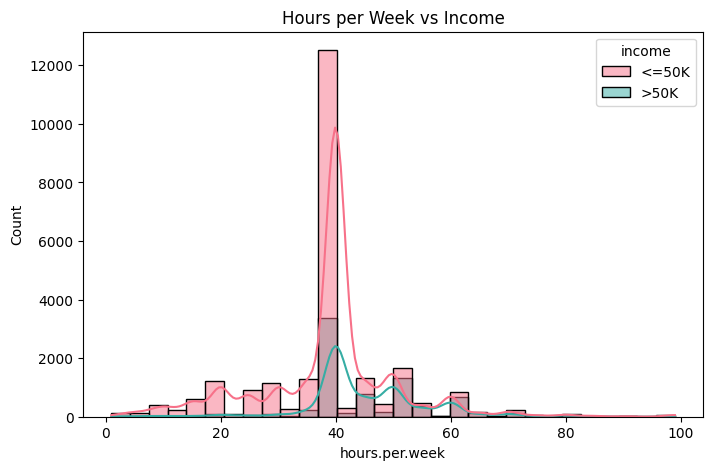

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="hours.per.week", hue="income", bins=30, kde=True, palette="husl")
plt.title("Hours per Week vs Income")
plt.show()

## ML Algorithms

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X = df.drop("income", axis=1)
y = df["income"]

In [ ]:
le = LabelEncoder()
for col in X.select_dtypes(include="object").columns:
    X[col] = le.fit_transform(X[col])

y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [ ]:
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    accuracy_scores[name] = acc
    print(f"{name}: {acc:.2f}%")

Logistic Regression: 82.68%
Decision Tree: 80.88%
Random Forest: 85.78%
Gradient Boosting: 86.32%
SVM: 84.72%


In [3]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="viridis")
plt.ylabel("Accuracy (%)")
plt.xlabel("Machine Learning Models")
plt.title("Model Comparison - Adult Income Prediction")
plt.xticks(rotation=30, ha="right")
plt.show()

NameError: name 'accuracy_scores' is not defined

<Figure size 1000x600 with 0 Axes>